# Importing and preparing rental apartments data

## Libraries and settings

In [34]:
# Libraries
import os
import re
import fnmatch
import datetime
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_03


## Importing data

In [35]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_zuerich.csv', sep=',', encoding='utf-8')

# Get number of rows and columns
df.shape

(1008, 7)

## Count number of rows and columns in the data frame

In [36]:
# Dimension (rows, columns)
print('Dimension:', df.shape)

# Number of rows
print('Number of rows:', df.shape[0])

# Number of columns
print('Number of columns:', df.shape[1])

Dimension: (1008, 7)
Number of rows: 1008
Number of columns: 7


## Get data types (raw-format from web scraping)

In [37]:
# Get data types (note that in pandas, a string is referred to as 'object')
df.dtypes

web-scraper-order        object
web-scraper-start-url    object
rooms_area_price_raw     object
address_raw              object
price_raw                object
description_raw          object
text_raw                 object
dtype: object

## Extract and save relevant information from raw data using regular expressions (regex)

### Extract number of rooms

In [38]:
# Extract values from 'rooms_area_price_raw' strings
rooms = []
for i in df['rooms_area_price_raw']:
    d1 = re.findall('(.*)Zimmer', i)
    try:
        d2 = d1[0].strip().replace(',', '.')
    except:
        d2 = None
    rooms.append(d2)

# Save as new variable in the pandas data frame
df['rooms'] = pd.Series(rooms, dtype="float64")
    
# Print first 5 values
print(df['rooms_area_price_raw'].head(5), '\n')
print(df['rooms'].head(5), '\n')

0      3 Zimmer, 49 m², CHF 1441.—
1    3,5 Zimmer, 65 m², CHF 1850.—
2                19 m², CHF 2686.—
3      2 Zimmer, 54 m², CHF 4853.—
4      2 Zimmer, 49 m², CHF 4335.—
Name: rooms_area_price_raw, dtype: object 

0    3.0
1    3.5
2    NaN
3    2.0
4    2.0
Name: rooms, dtype: float64 



### Extract living area

In [39]:
# Extract values from 'rooms_area_price_raw' strings
area = []
for i in df['rooms_area_price_raw']:
    d1 = re.findall('Zimmer, (.*)m²', i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    area.append(d2)

# Save as new variable in the pandas data frame
df['area'] = pd.Series(area, dtype="float64")

# Print first 5 values
print(df['rooms_area_price_raw'].head(5), '\n')
print(df['area'].head(5), '\n')

0      3 Zimmer, 49 m², CHF 1441.—
1    3,5 Zimmer, 65 m², CHF 1850.—
2                19 m², CHF 2686.—
3      2 Zimmer, 54 m², CHF 4853.—
4      2 Zimmer, 49 m², CHF 4335.—
Name: rooms_area_price_raw, dtype: object 

0    49.0
1    65.0
2     NaN
3    54.0
4    49.0
Name: area, dtype: float64 



### Extract rental price

In [40]:
# Extract values from 'price_raw' strings
price = []
for i in df['price_raw']:
    d1 = re.findall('[0-9]+', i)
    try:
        d2 = d1[0].strip()
    except:
        d2 = None
    price.append(d2)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="float64")

# Print first 5 values
print(df['price_raw'].head(), '\n')
print(df['price'].head())

0    CHF 1441.—
1    CHF 1850.—
2    CHF 2686.—
3    CHF 4853.—
4    CHF 4335.—
Name: price_raw, dtype: object 

0    1441.0
1    1850.0
2    2686.0
3    4853.0
4    4335.0
Name: price, dtype: float64


## Create additional variables from the apartment's descriptions

### Change strings in 'description_raw' ad 'text_raw' to uppercase 

In [41]:
# Change strings to uppercase 
df['description_raw'] = df['description_raw'].str.upper()
print(df['description_raw'].head(10), '\n')

df['text_raw'] = df['text_raw'].str.upper()
print(df['text_raw'].head(10))

0                   «GEMÜTLICHE WOHNUNG IM GRÜNEN»
1    «ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»
2                «STUDIO APARTMENT JUNIOR BALCONY»
3             «2 BEDROOM APARTMENT SENIOR BALCONY»
4             «2 BEDROOM APARTMENT JUNIOR TERRACE»
5                «STUDIO APARTMENT SENIOR TERRACE»
6             «1 BEDROOM APARTMENT JUNIOR TERRACE»
7                     «2 BEDROOM APARTMENT JUNIOR»
8                        «STUDIO APARTMENT JUNIOR»
9                     «1 BEDROOM APARTMENT JUNIOR»
Name: description_raw, dtype: object 

0    3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 86...
1    3,5 ZIMMER, 65 M², CHF 1850.—ZÜRCHERSTRASSE 1,...
2    19 M², CHF 2686.—CRAMERSTRASSE 8-12, 8004 ZÜRI...
3    2 ZIMMER, 54 M², CHF 4853.—CRAMERSTRASSE 8-12,...
4    2 ZIMMER, 49 M², CHF 4335.—ROTACHSTRASSE 33, 8...
5    34 M², CHF 3205.—BINZMÜHLESTR. 50, 8050 ZÜRICH...
6    25 M², CHF 3308.—ROTACHSTRASSE 33, 8003 ZÜRICH...
7    43 M², CHF 4241.—MILITÄRSTRASSE 24, 8004 ZÜRIC...
8    19 M²,

### Calculate lenght of strings in 'description_raw' and 'text_raw'

In [42]:
# Show first item of variable 'description_raw'
print(df['description_raw'][0])

# Lenght of the strings in 'description_raw'
df['description_raw_len'] = df['description_raw'].str.len()
print(df['description_raw_len'], '\n')

# Show first item of variable 'text_raw'
print(df['text_raw'][0])

# Lenght of the strings in 'text_raw'
df['text_raw_len'] = df['text_raw'].str.len()
print(df['text_raw_len'])

«GEMÜTLICHE WOHNUNG IM GRÜNEN»
0       30
1       45
2       33
3       36
4       36
        ..
1003    47
1004    47
1005    56
1006    33
1007    40
Name: description_raw_len, Length: 1008, dtype: int64 

3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 8630 RÜTI ZH, ZH«GEMÜTLICHE WOHNUNG IM GRÜNEN»WIR VERMIETEN DIESE GEMÜTLICHE 3-ZIMMERWOHNUNG IN RÜTI ZH.DIE WOHNUNG ÜBERZEUGT MIT FOLGENDEN ECKDATEN:- KÜCHE: SANIERT 2012 MIT MODERNEM AUSBAUSTANDART, GESCHIRRSPÜLER, BACKOFEN, GLASKERAMIKHERD, GROSSER KÜHLSCHRANK- BAD: SANIERT 2012, MODERNER, SCHLICHTER STIL MIT BADEWANNE UND FENSTER- BALKON: MIT SICHT INS GRÜNE- KORRIDOR: PLATTENBELAG UND PLATZ FÜR GARDEROBE- WOHNRÄUME: LAMINAT UND FENSTERFRONT MIT VIEL LICHT- FENSTER/FASSADE UND BALKONE 2023 FRISCH SANIERT- KELLER- UND ESTRICHABTEIL- WASCHKÜCHE ZUR MITBENUTZUNG- FENSTER, BALKONE UND FASSA
0       640
1       658
2       682
3       695
4       693
       ... 
1003    668
1004    679
1005    712
1006    653
1007    655
Name: text_raw_len,

### Create new binary (0/1) variable 'luxurious' from the description

In [43]:
# Create a pattern which can be used to search the variable 'description_raw'
pattern = 'LOFT|SEESICHT'

# Create new variable 'luxurious' as binary dummy (0/1) variable
df['luxurious'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['luxurious'].sum())

# Show values
df[['description_raw','rooms','area','price','luxurious']]

21


,description_raw,rooms,area,price,luxurious
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49.0,1441.0,0
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65.0,1850.0,0
2,«STUDIO APARTMENT JUNIOR BALCONY»,NaN,NaN,2686.0,0
3,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54.0,4853.0,0
4,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49.0,4335.0,0
...,...,...,...,...,...
1003,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82.0,2830.0,0
1004,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73.0,1713.0,0
1005,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110.0,3500.0,1
1006,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68.0,1650.0,0


### Other new binary variables

#### Furnished

In [44]:
# New variable 'furnished' as binary dummy (0/1) variable
pattern = 'MÖBLIERT|EINGERICHTET'
df['furnished'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['furnished'].sum())

# Show values with furnished = 1
df[df['furnished'] == 1][['description_raw','rooms','area','price','furnished']].head(10)


38


,description_raw,rooms,area,price,furnished
49,"«MÖBLIERT, TEMPORÄR: 2½ ZI-WOHNUNG IN GLATTPAR...",2.5,78.0,2750.0,1
77,"«MÖBLIERT, TEMPORÄR: 2½ ZI-WOHNUNG IN ZÜRICH -...",2.5,45.0,2520.0,1
78,«MÖBLIERTES ZIMMER (NEU!)»,1.0,18.0,1100.0,1
85,«MÖBLIERTES GROSSES ZIMMER IN WEININGEN ZH»,1.0,30.0,500.0,1
86,"«MÖBLIERT, TEMPORÄR: 2 ZI-WOHNUNG IN ZÜRICH - ...",2.0,70.0,1625.0,1
88,«MODERN MÖBLIERTES WG-ZIMMER IN BÜLACH»,1.0,20.0,750.0,1
89,"«MÖBLIERT, TEMPORÄR: 4½ ZI-WOHNUNG IN WINTERTH...",4.5,117.0,3782.0,1
145,«LUXURIÖS MÖBLIERTE 3.0 ZI-WHG MIT EINZIGARTIG...,3.0,100.0,4800.0,1
147,«MÖBLIERT: 2½ ZI-WOHNUNG IN ZÜRICH - KREIS 4»,2.5,48.0,3360.0,1
149,«MÖBLIERTE 4.5 ZIMMER-WOHNUNG MIT TRAUMHAFTER ...,4.5,104.0,2800.0,1


#### Balcony

In [45]:
# New variable 'balcony' as binary dummy (0/1) variable
pattern = 'BALKON|TERRASSE|LOGGIA|SITZPLATZ'
df['balcony'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['balcony'].sum())

df[df['balcony'] == 1][['description_raw','rooms','area','price','balcony']].head(10)

90


,description_raw,rooms,area,price,balcony
24,«MODERNE 3.5-ZIMMER-NEUBAUWOHNUNG MIT BALKON U...,3.5,105.0,3200.0,1
44,«CHARMANTE WOHNUNG MIT TRAUMHAFTER TERRASSE»,3.5,80.0,2237.0,1
50,«GEMÜTLICHE 4.5-ZIMMER-WOHNUNG MIT EINEM SONNI...,4.5,107.0,1900.0,1
51,«MODERNES LEBEN IM EG MIT GARTENSITZPLATZ»,3.5,88.0,2244.0,1
64,«TRAUMHAFTE GARTENWOHNUNG MIT SITZPLATZ UND EI...,3.5,81.0,2650.0,1
66,«SCHÖNE 3.5-ZIMMERWOHNUNG MIT BALKON ZU VERMIE...,3.5,80.0,1980.0,1
114,«WUNDERSCHÖNE BALKONWOHNUNG AN RUHIGER LAGE»,2.5,57.0,1370.0,1
115,«IHR NEUES ZUHAUSE MIT GARTENSITZPLATZ»,2.5,60.0,1510.0,1
116,«4.5-ZIMMERWOHNUNG MIT GROSSEM BALKON»,4.5,124.0,2170.0,1
125,«GEMÜTLICHE 4.5-ZIMMER WOHNUNG IN ALTIKON MIT ...,4.5,133.0,2000.0,1


#### Central

In [46]:
# New variable 'central' as binary dummy (0/1) variable
pattern = 'ZENTRAL|CITYNAH|STADTNÄHE|MITTE|ZENTRUM'
df['central'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['central'].sum())

df[df['central'] == 1][['description_raw','rooms','area','price','central']].head(10)

112


,description_raw,rooms,area,price,central
48,«EINFAMILIENHAUS MITTEN AUF DEM LAND»,5.5,NaN,2348.0,1
53,«WOHNUNG AN ZENTRALER LAGE IM ANDREASPARK»,4.5,141.0,3309.0,1
57,"«1.5-ZIMMER-WOHNUNG AN RUHIGER, ZENTRALER LAGE»",1.5,35.0,1740.0,1
58,"«VIEL RAUM, RENOVIERT UND ZENTRAL»",4.0,80.0,2150.0,1
67,«ZENTRALES LOFTLEBEN NEUES DESIGN»,NaN,NaN,2590.0,1
95,«MODERNES STUDIO AN ZENTRALER LAGE ZU VERMIETEN!»,1.0,25.0,1290.0,1
124,«FAMILIÄRES WOHLFÜHLEN AN ZENTRALER UND RUHIGE...,6.5,143.0,3500.0,1
126,«SCHÖNE WOHNUNG IM ZENTRUM VON WETZIKON!»,3.5,74.0,1989.0,1
129,"«4-ZIMMER-WOHNUNG, SONNIG, RUHIG, ZENTRAL»",4.0,76.0,2200.0,1
169,«HELLE 3.5 - ZIMMERWOHNUNG IM ZENTRUM VON SCHL...,3.5,96.0,2787.0,1


#### Pets

In [47]:
# New variable 'pets' as binary dummy (0/1) variable
pattern = 'HAUSTIERE|HUNDE|KATZEN|TIERE'
df['pets'] = df['description_raw'].str.contains(pat = pattern).astype(int)
print(df['pets'].sum())

df[df['pets'] == 1][['description_raw','rooms','area','price','pets']].head(10)

1


,description_raw,rooms,area,price,pets
148,«NUR EINEN KATZENSPRUNG VON DER SEEBADI ENTFER...,4.5,177.0,3970.0,1


### Create new categorical variable based on apartment area

In [48]:
# Define classes (labels)
labels = ['0 - 49', '50 - 99', '100 - 9999']

# Use the .cut method from pandas to divide the numeric values in classes
df["area_cat"] = pd.cut(df['area'], bins=[0, 50, 100, 10000], labels=labels)

# Show original data and classes
df[['area', 'area_cat']]

,area,area_cat
0,49.0,0 - 49
1,65.0,50 - 99
2,NaN,NaN
3,54.0,50 - 99
4,49.0,0 - 49
...,...,...
1003,82.0,50 - 99
1004,73.0,50 - 99
1005,110.0,100 - 9999
1006,68.0,50 - 99


### Create new numeric variable 'price_per_m2'

In [49]:
# Create the new variable
df['price_per_m2'] = round(df['price'] / df['area'], 2)

# Show values
df[['description_raw','rooms','area','price','luxurious','price_per_m2']]

,description_raw,rooms,area,price,luxurious,price_per_m2
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49.0,1441.0,0,29.41
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65.0,1850.0,0,28.46
2,«STUDIO APARTMENT JUNIOR BALCONY»,NaN,NaN,2686.0,0,NaN
3,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54.0,4853.0,0,89.87
4,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49.0,4335.0,0,88.47
...,...,...,...,...,...,...
1003,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82.0,2830.0,0,34.51
1004,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73.0,1713.0,0,23.47
1005,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110.0,3500.0,1,31.82
1006,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68.0,1650.0,0,24.26


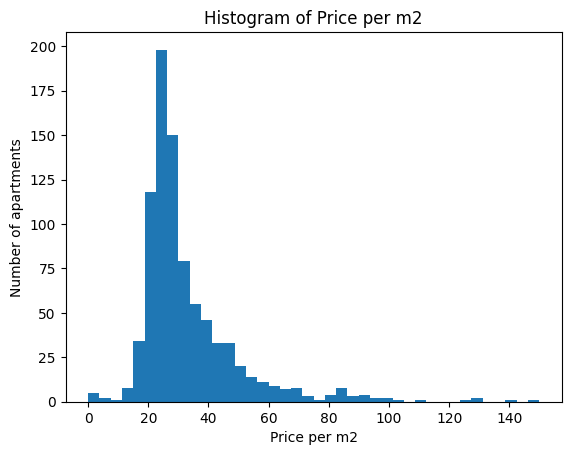

In [50]:
# Histogram of price per m2
import matplotlib.pyplot as plt
plt.hist(df['price_per_m2'], bins=40)
plt.xlabel('Price per m2')
plt.ylabel('Number of apartments')
plt.title('Histogram of Price per m2')
plt.show()

### Categorical price (new)

In [51]:
labels = ['low', 'medium', 'high']

df["price_cat"] = pd.cut(df['price_per_m2'], bins =[0, 20,40,200], labels=labels)

# Show original data and classes
df[['price_per_m2', 'price_cat']]

,price_per_m2,price_cat
0,29.41,medium
1,28.46,medium
2,NaN,NaN
3,89.87,high
4,88.47,high
...,...,...
1003,34.51,medium
1004,23.47,medium
1005,31.82,medium
1006,24.26,medium


### Including current datetime

In [52]:
# Get and format datetime
df['datetime'] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Show values
df[['description_raw','rooms','area','price','luxurious','price_per_m2', 'datetime']]

,description_raw,rooms,area,price,luxurious,price_per_m2,datetime
0,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,3.0,49.0,1441.0,0,29.41,2025-10-02 12:20:43
1,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,3.5,65.0,1850.0,0,28.46,2025-10-02 12:20:43
2,«STUDIO APARTMENT JUNIOR BALCONY»,NaN,NaN,2686.0,0,NaN,2025-10-02 12:20:43
3,«2 BEDROOM APARTMENT SENIOR BALCONY»,2.0,54.0,4853.0,0,89.87,2025-10-02 12:20:43
4,«2 BEDROOM APARTMENT JUNIOR TERRACE»,2.0,49.0,4335.0,0,88.47,2025-10-02 12:20:43
...,...,...,...,...,...,...,...
1003,"«CHARMANTE WOHNUNG IN HOTTINGEN, NÄHE RÖMERHOF»",3.5,82.0,2830.0,0,34.51,2025-10-02 12:20:43
1004,«HEIMELIGE 4-ZIMMER-WOHNUNG IN WINTERTHUR-HEGI»,4.0,73.0,1713.0,0,23.47,2025-10-02 12:20:43
1005,«EXKLUSIVE WOHNUNG FÜR HÖCHSTE ANSPRÜCHE - MIT...,4.5,110.0,3500.0,1,31.82,2025-10-02 12:20:43
1006,«MODERNE WOHNUNG AN RUHIGER LAGE»,3.0,68.0,1650.0,0,24.26,2025-10-02 12:20:43


## Count, identify and remove missing values

In [53]:
# Count missing values
print('Count missing values per variable')
print(pd.isna(df).sum(), '\n')

# Identify rows with missing values
print('Identify rows with missing values')
print(df.loc[df.isna().any(axis=1)][['rooms', 'area', 'price']], '\n')

# Drop rows where at least one element is missing.
df2 = df.dropna()
df2.head()

Count missing values per variable
web-scraper-order          0
web-scraper-start-url      0
rooms_area_price_raw       0
address_raw                0
price_raw                  0
description_raw            0
text_raw                   0
rooms                     45
area                     135
price                     15
description_raw_len        0
text_raw_len               0
luxurious                  0
furnished                  0
balcony                    0
central                    0
pets                       0
area_cat                 135
price_per_m2             143
price_cat                143
datetime                   0
dtype: int64 

Identify rows with missing values
     rooms  area   price
2      NaN   NaN  2686.0
5      NaN   NaN  3205.0
6      NaN   NaN  3308.0
7      NaN   NaN  4241.0
8      NaN   NaN  2582.0
..     ...   ...     ...
929    3.5   NaN  1910.0
956    4.5   NaN  2000.0
957    6.5   NaN  3200.0
970    1.0   NaN  1350.0
993    3.5   NaN  3087.0

[143 ro

,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw,rooms,area,price,...,text_raw_len,luxurious,furnished,balcony,central,pets,area_cat,price_per_m2,price_cat,datetime
0,1693998201-1,https://www.immoscout24.ch/de/immobilien/miete...,"3 Zimmer, 49 m², CHF 1441.—","Neuhusstrasse 6, 8630 Rüti ZH, ZH",CHF 1441.—,«GEMÜTLICHE WOHNUNG IM GRÜNEN»,"3 ZIMMER, 49 M², CHF 1441.—NEUHUSSTRASSE 6, 86...",3.0,49.0,1441.0,...,640,0,0,0,0,0,0 - 49,29.41,medium,2025-10-02 12:20:43
1,1693998201-2,https://www.immoscout24.ch/de/immobilien/miete...,"3,5 Zimmer, 65 m², CHF 1850.—","Zürcherstrasse 1, 8173 Neerach, ZH",CHF 1850.—,«ATTRAKTIVE 3.5-ZIMMER-EG-WOHNUNG IN NEERACH»,"3,5 ZIMMER, 65 M², CHF 1850.—ZÜRCHERSTRASSE 1,...",3.5,65.0,1850.0,...,658,0,0,0,0,0,50 - 99,28.46,medium,2025-10-02 12:20:43
3,1693998201-4,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 54 m², CHF 4853.—","Cramerstrasse 8-12, 8004 Zürich, ZH",CHF 4853.—,«2 BEDROOM APARTMENT SENIOR BALCONY»,"2 ZIMMER, 54 M², CHF 4853.—CRAMERSTRASSE 8-12,...",2.0,54.0,4853.0,...,695,0,0,0,0,0,50 - 99,89.87,high,2025-10-02 12:20:43
4,1693998201-5,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 49 m², CHF 4335.—","Rotachstrasse 33, 8003 Zürich, ZH",CHF 4335.—,«2 BEDROOM APARTMENT JUNIOR TERRACE»,"2 ZIMMER, 49 M², CHF 4335.—ROTACHSTRASSE 33, 8...",2.0,49.0,4335.0,...,693,0,0,0,0,0,0 - 49,88.47,high,2025-10-02 12:20:43
15,1693998201-16,https://www.immoscout24.ch/de/immobilien/miete...,"2 Zimmer, 32 m², CHF 3515.—","Wolframplatz 1, 8045 Zürich, ZH",CHF 3515.—,«2 BEDROOM APARTMENT MINI»,"2 ZIMMER, 32 M², CHF 3515.—WOLFRAMPLATZ 1, 804...",2.0,32.0,3515.0,...,681,0,0,0,0,0,0 - 49,109.84,high,2025-10-02 12:20:43


## Count, identify & remove duplicated values

In [54]:
# Count duplicated values in the whole data set
print('Sum of missing values:', df.duplicated().sum(), '\n')

# Identify duplicated values in 'rooms', 'area', 'price'
print('Duplicated values')
print(df.loc[df.duplicated(keep = 'last')])

# Drop the rows with duplicated values
df3 = df2.drop_duplicates()

Sum of missing values: 0 

Duplicated values
Empty DataFrame
Columns: [web-scraper-order, web-scraper-start-url, rooms_area_price_raw, address_raw, price_raw, description_raw, text_raw, rooms, area, price, description_raw_len, text_raw_len, luxurious, furnished, balcony, central, pets, area_cat, price_per_m2, price_cat, datetime]
Index: []

[0 rows x 21 columns]


### Save data to file

In [55]:
df3.to_csv('apartments_data_prepared.csv', 
          sep=",", 
          encoding='utf-8',
          index=False)

In [56]:
!jupyter nbconvert --to html apartments_data_preparation_zuerich.ipynb

[NbConvertApp] Converting notebook apartments_data_preparation_zuerich.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 388092 bytes to apartments_data_preparation_zuerich.html


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [57]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-10-02 12:20:48
Python Version: 3.11.13
-----------------------------------
